In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
crude_suicide_rates = pd.read_csv('/Users/sriyamannepalli/Downloads/Crude suicide rates.csv')
facilities = pd.read_csv('/Users/sriyamannepalli/Downloads/Facilities.csv')

In [27]:
age_columns = ['80_above', '70to79', '60to69', '30to39', '20to29', '10to19', 'Country']


In [29]:
crude_suicide_rates.columns = crude_suicide_rates.columns.str.strip()
crude_suicide_rates.columns

Index(['Country', 'Sex', '80_above', '70to79', '60to69', '50to59', '40to49',
       '30to39', '20to29', '10to19', 'average_suicide_rate'],
      dtype='object')

In [31]:
crude_suicide_rates_subset = crude_suicide_rates[age_columns]
crude_suicide_rates_subset.head()

,80_above,70to79,60to69,30to39,20to29,10to19,Country
0,42.0,11.0,5.5,9.2,10.2,3.1,Afghanistan
1,70.4,20.9,9.8,15.1,16.3,4.8,Afghanistan
2,20.1,2.3,1.4,2.7,3.5,1.2,Afghanistan
3,16.3,8.3,6.0,6.1,6.5,5.0,Albania
4,23.2,11.9,8.1,8.8,6.3,3.1,Albania


In [37]:
columns_to_keep = ['Mental _hospitals', 'health_units', 'day _treatment', 'Country']
facilities_subset = facilities[columns_to_keep]
facilities_subset.head()

,Mental _hospitals,health_units,day _treatment,Country
0,0.003,0.012,NaN,Afghanistan
1,0.068,0.068,NaN,Albania
2,0.048,0.068,NaN,Algeria
3,0.011,NaN,NaN,Angola
4,1.001,NaN,NaN,Antigua and Barbuda


In [43]:
merged_df = pd.merge(crude_suicide_rates_subset, facilities_subset, on='Country', how='inner')

In [45]:
print(merged_df.head())

   80_above  70to79  60to69  30to39  20to29  10to19      Country  \
0      42.0    11.0     5.5     9.2    10.2     3.1  Afghanistan   
1      70.4    20.9     9.8    15.1    16.3     4.8  Afghanistan   
2      20.1     2.3     1.4     2.7     3.5     1.2  Afghanistan   
3      16.3     8.3     6.0     6.1     6.5     5.0      Albania   
4      23.2    11.9     8.1     8.8     6.3     3.1      Albania   

   Mental _hospitals  health_units  day _treatment  
0              0.003         0.012             NaN  
1              0.003         0.012             NaN  
2              0.003         0.012             NaN  
3              0.068         0.068             NaN  
4              0.068         0.068             NaN  


In [47]:
merged_df_clean = merged_df.dropna()
print(merged_df_clean.isna().sum())  # Ensure there are no missing values
print(merged_df_clean.shape)  

80_above             0
70to79               0
60to69               0
30to39               0
20to29               0
10to19               0
Country              0
Mental _hospitals    0
health_units         0
day _treatment       0
dtype: int64
(123, 10)


In [49]:
print(merged_df_clean)

     80_above  70to79  60to69  30to39  20to29  10to19     Country  \
21        7.7     6.6     4.5     3.2     2.2     1.4  Azerbaijan   
22       12.5    10.4     7.3     5.4     3.4     2.1  Azerbaijan   
23        5.0     4.0     2.1     1.0     0.9     0.6  Azerbaijan   
27       40.6    32.4    32.0    30.6    18.9     4.8     Belarus   
28       96.1    76.8    65.3    52.1    32.3     7.6     Belarus   
..        ...     ...     ...     ...     ...     ...         ...   
310       7.1    11.2    12.8    13.9    12.2     8.5  Uzbekistan   
311       3.5     3.1     2.2     4.7     9.0     9.6  Uzbekistan   
324     205.7    81.5    41.3    13.7    11.3     4.6    Zimbabwe   
325     285.0   111.5    62.8    22.8    19.1     6.4    Zimbabwe   
326     152.4    59.4    26.4     5.5     3.8     2.7    Zimbabwe   

     Mental _hospitals  health_units  day _treatment  
21               0.114         0.021           0.094  
22               0.114         0.021           0.094  
23    

In [51]:
correlation_matrix = merged_df[['80_above', '70to79', '60to69', '30to39', '20to29', '10to19', 'Mental _hospitals', 'health_units', 'day _treatment']].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                    80_above    70to79    60to69    30to39    20to29    10to19  \
80_above           1.000000  0.942878  0.822254  0.316714  0.221289  0.089896   
70to79             0.942878  1.000000  0.920744  0.415534  0.303220  0.163043   
60to69             0.822254  0.920744  1.000000  0.633426  0.502386  0.333851   
30to39             0.316714  0.415534  0.633426  1.000000  0.919813  0.714979   
20to29             0.221289  0.303220  0.502386  0.919813  1.000000  0.835743   
10to19             0.089896  0.163043  0.333851  0.714979  0.835743  1.000000   
Mental _hospitals -0.064221 -0.038939  0.016231  0.071696  0.083589  0.021540   
health_units      -0.074673 -0.066032  0.064259  0.089652  0.033463  0.125724   
day _treatment    -0.000098  0.041220  0.067740  0.101304  0.084402  0.182138   

                   Mental _hospitals  health_units  day _treatment  
80_above                   -0.064221     -0.074673       -0.000098  
70to79                     -0.

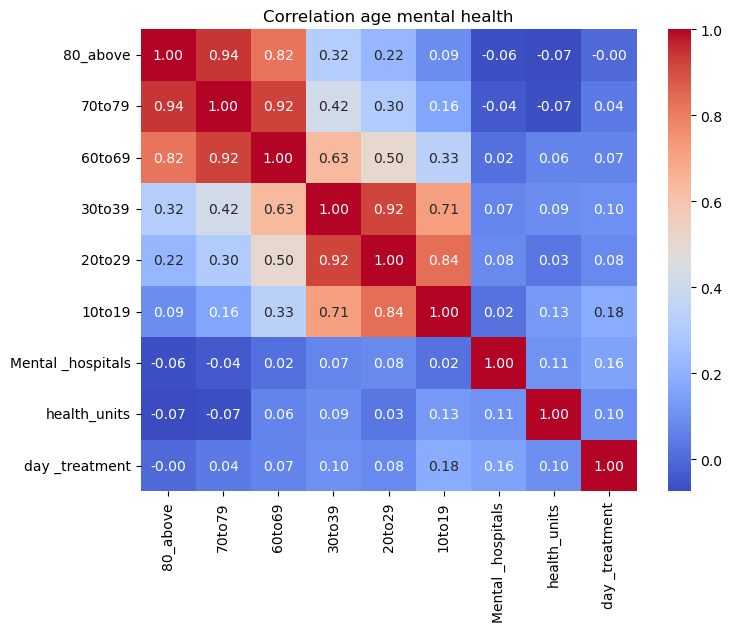

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation age mental health')
plt.show()

In [159]:
X = merged_df_clean[['Mental _hospitals', 'health_units', 'day _treatment']]
y = merged_df_clean['20to29']

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 79.14513094115088
R-squared: -0.020046926606735127


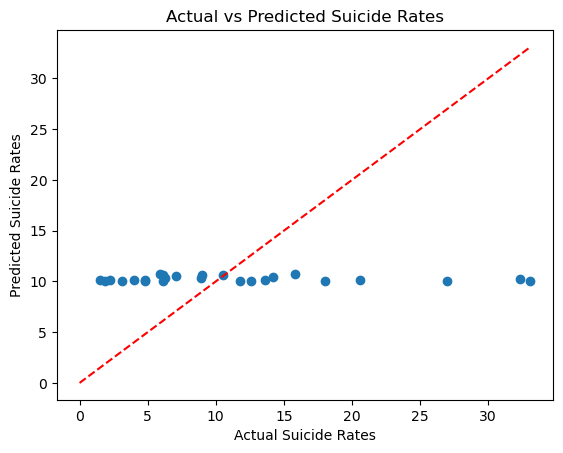

In [167]:
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Suicide Rates')
plt.ylabel('Predicted Suicide Rates')
plt.title('Actual vs Predicted Suicide Rates')
plt.show()

In [125]:
melted_df = merged_df_clean.melt(
    id_vars=['Mental _hospitals', 'health_units', 'day _treatment'],  # Columns to keep
    value_vars=['80_above', '70to79', '60to69', '30to39', '20to29', '10to19'],  # Suicide rates by age group
    var_name='age_group', 
    value_name='suicide_rate'
)

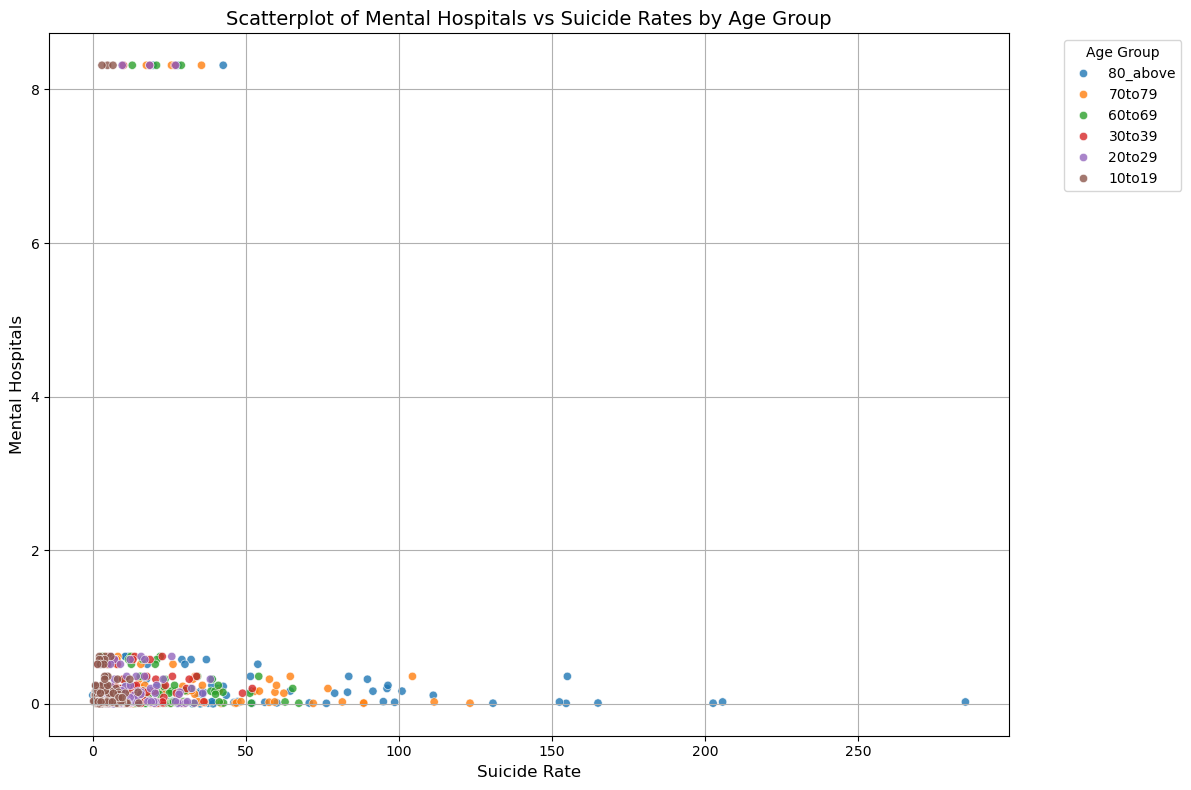

In [143]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=melted_df,
    x='suicide_rate', 
    y='Mental _hospitals',  # Change to 'health_units' or 'day_treatment' for other facilities
    hue='age_group', 
    alpha=0.8
)

# Add titles and labels
plt.title("Scatterplot of Mental Hospitals vs Suicide Rates by Age Group", fontsize=14)
plt.xlabel("Suicide Rate", fontsize=12)
plt.ylabel("Mental Hospitals", fontsize=12)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

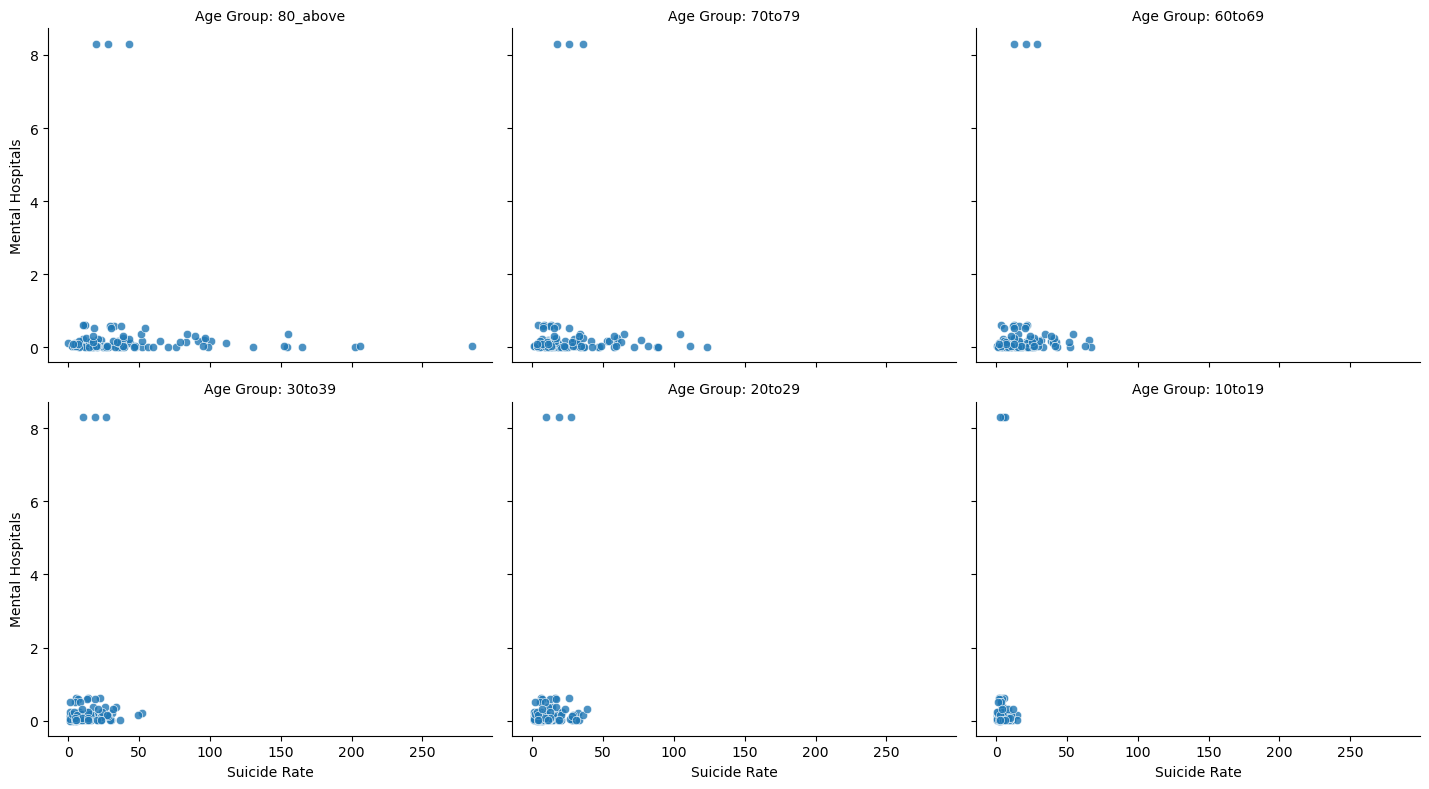

In [137]:
melted_df_facet = merged_df_clean.melt(
    id_vars=['Country', 'Mental _hospitals', 'health_units', 'day _treatment'], 
    value_vars=['80_above', '70to79', '60to69', '30to39', '20to29', '10to19'], 
    var_name='age_group', 
    value_name='suicide_rate'
)

# Create FacetGrid
g = sns.FacetGrid(
    melted_df_facet, 
    col='age_group', 
    col_wrap=3, 
    height=4, 
    aspect=1.2
)
g.map_dataframe(sns.scatterplot, x='suicide_rate', y='Mental_hospitals', alpha=0.8)  # Modify y for other facilities

# Add titles and labels
g.set_axis_labels("Suicide Rate", "Mental Hospitals")
g.set_titles("Age Group: {col_name}")
g.tight_layout()

# Show plot
plt.show()

Train RMSE: 25.76
Test RMSE: 24.88
R-squared: -0.02


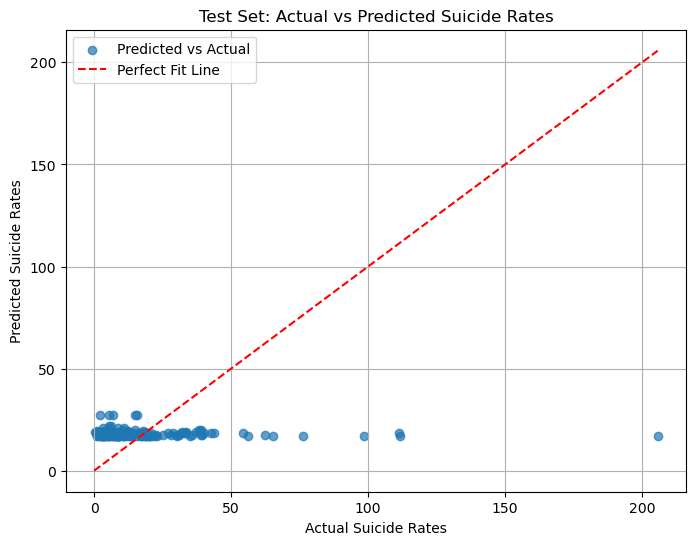

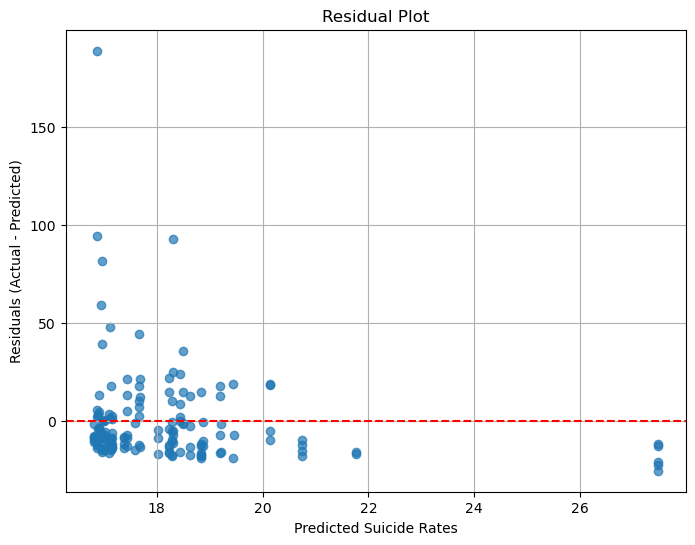

In [147]:
import numpy as np

features = ['Mental _hospitals', 'health_units', 'day _treatment']
targets = ['80_above', '70to79', '60to69', '30to39', '20to29', '10to19']

# Reshape the dataset: each row will correspond to a specific country and age group
data = merged_df_clean.melt(
    id_vars=features, 
    value_vars=targets, 
    var_name='age_group', 
    value_name='suicide_rate'
)

# Separate features (X) and target (y)
X = data[features]
y = data['suicide_rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualization: Scatter plot of Actual vs Predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Predicted vs Actual')
plt.plot([0, y_test.max()], [0, y_test.max()], '--r', label='Perfect Fit Line')
plt.title('Test Set: Actual vs Predicted Suicide Rates')
plt.xlabel('Actual Suicide Rates')
plt.ylabel('Predicted Suicide Rates')
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Suicide Rates')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [173]:
crude_suicide_rates_subset['average_suicide_rate'] = crude_suicide_rates_subset[['80_above', '70to79', '60to69', '30to39', '20to29', '10to19']].mean(axis=1)
merged_data = pd.merge(facilities_subset, crude_suicide_rates_subset[['Country', 'average_suicide_rate']], on='Country')


/var/folders/69/9dy6b9w56vz116w3zr_r6qp40000gn/T/ipykernel_69020/1149901873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crude_suicide_rates_subset['average_suicide_rate'] = crude_suicide_rates_subset[['80_above', '70to79', '60to69', '30to39', '20to29', '10to19']].mean(axis=1)


R² Score: 0.18359878599531523
Mean Squared Error: 283.4467702985236


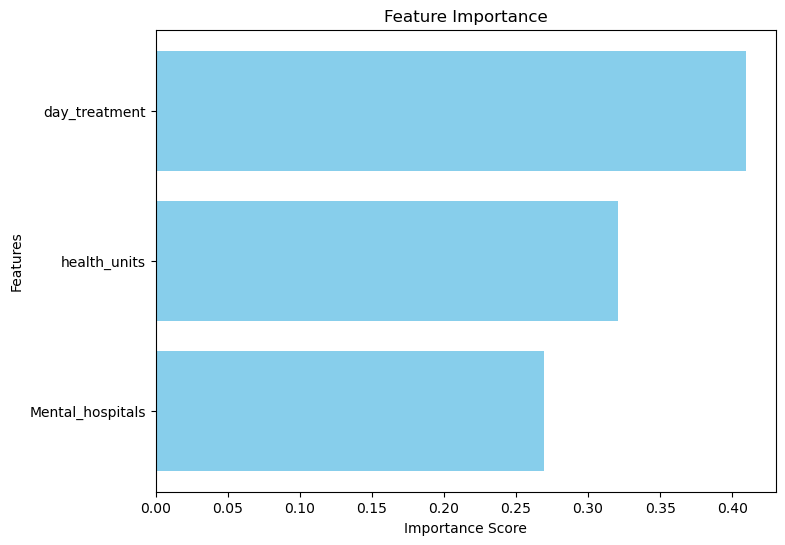

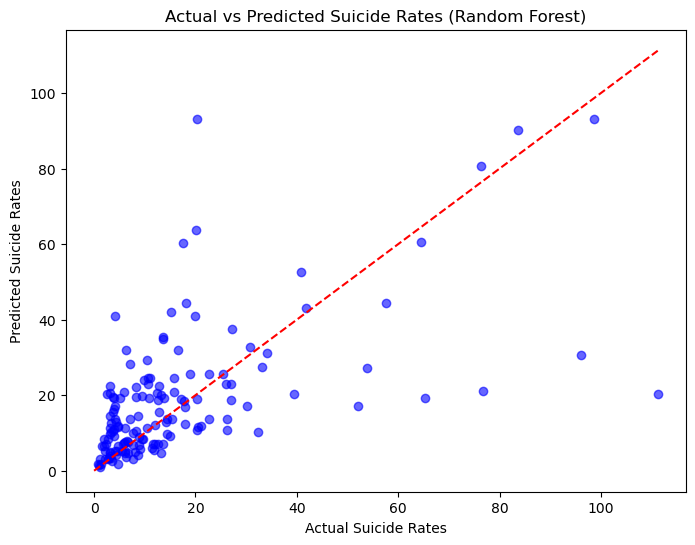

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np




X = merged_df_clean[['Mental _hospitals', 'health_units', 'day _treatment']]
y = merged_df_clean[['80_above', '70to79', '60to69', '30to39', '20to29', '10to19']]  # Adjust based on age group columns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


feature_importances = rf_model.feature_importances_
features = ['Mental_hospitals', 'health_units', 'day_treatment']

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.flatten(), y_pred.flatten(), color='blue', alpha=0.6)
plt.plot([0, max(y_test.values.flatten())], [0, max(y_test.values.flatten())], 'r--')
plt.xlabel("Actual Suicide Rates")
plt.ylabel("Predicted Suicide Rates")
plt.title("Actual vs Predicted Suicide Rates (Random Forest)")
plt.show()
